 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [185]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close'] = sp500_history["Close"].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_returns = sp500_returns.rename(columns={
    "Close": "S&P 500"
})

sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_portfolio = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

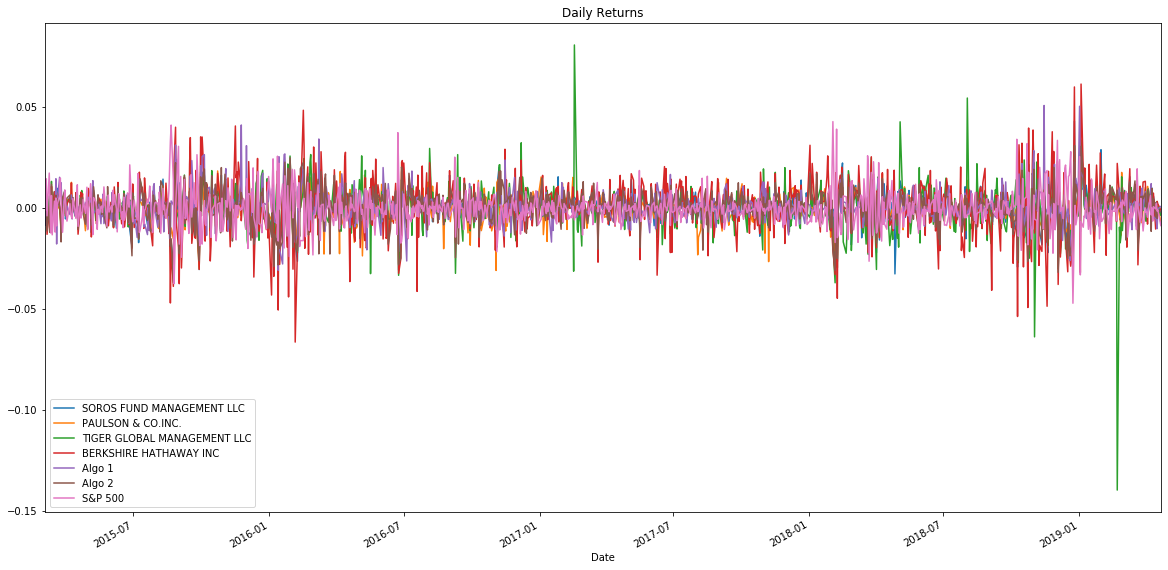

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_portfolio.plot(figsize=(20,10), title="Daily Returns")

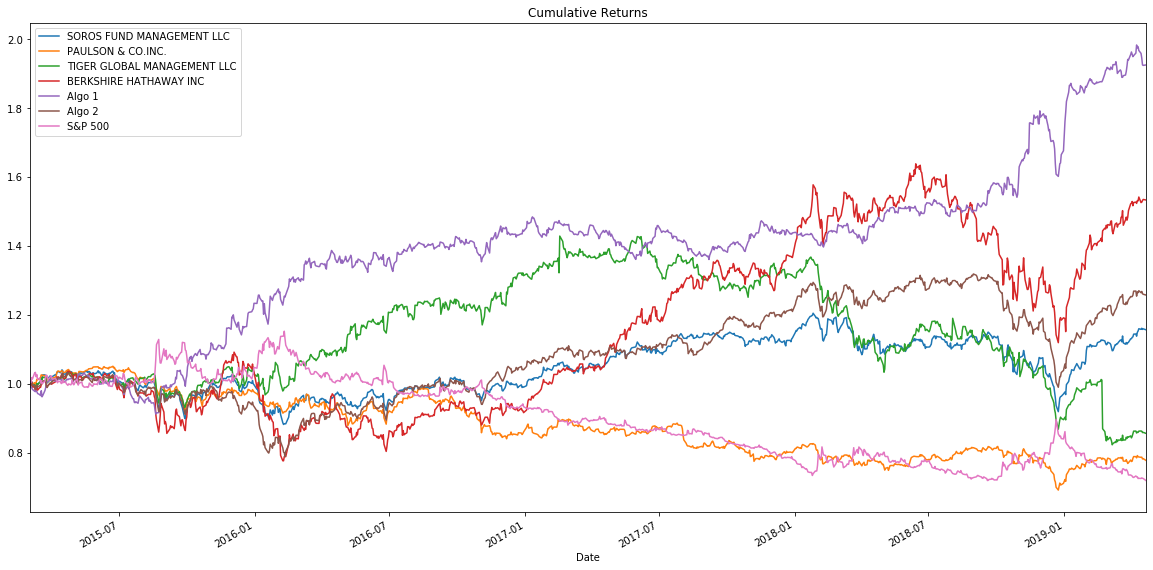

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_portfolio).cumprod()
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

All portfolios seem to outperform the S&P 500, albeit some considerably more than others. Two in particular, Tiger Global Management LLC and Paulson & Co. INC., just norrowly had better returns than the benchmark.

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

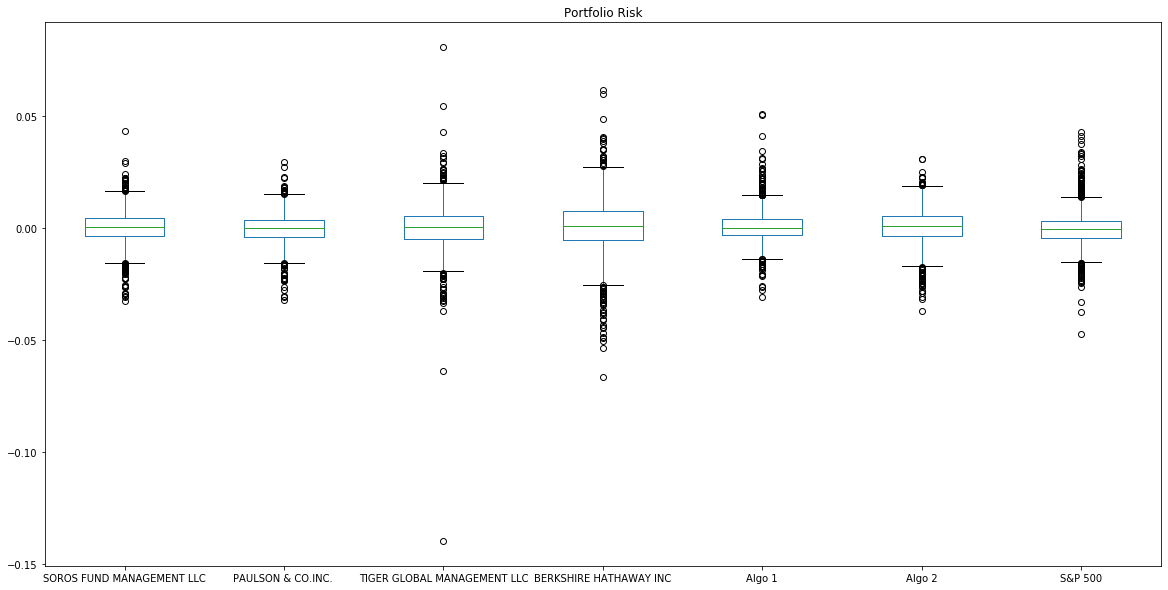

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_portfolio.plot(kind="box", title="Portfolio Risk", figsize=(20,10))

The box for Berkshire Hathaway INC has the largest spread and Paulson & CO INC had the lowest.

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_portfolio_std = combined_portfolio.std()
combined_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_portfolio_std > combined_portfolio_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

The porfolios of Tiger Global Management LLC and Berkshire Hathaway are riskier than the S&P 500.

In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_portfolio_std_annualized = combined_portfolio_std * np.sqrt(252)
combined_portfolio_std_annualized

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

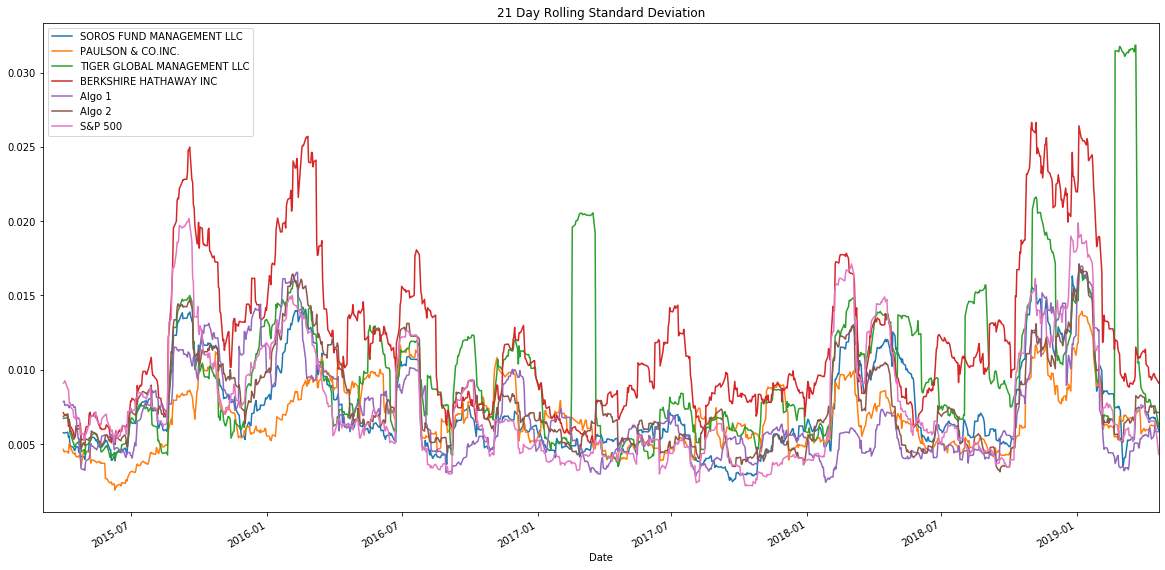

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_portfolio_rolling_std = combined_portfolio.rolling(window=21).std()
combined_portfolio_rolling_std.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

There seems to be a trend that indicates that the risk in all portfolios increases at the same time as the risk in S&P 500 increases. 

In [22]:
# Correlation
# YOUR CODE HERE
correlation = combined_portfolio.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


The portfolio of Paulson & CO INC has the most correlation to the S&P 500.

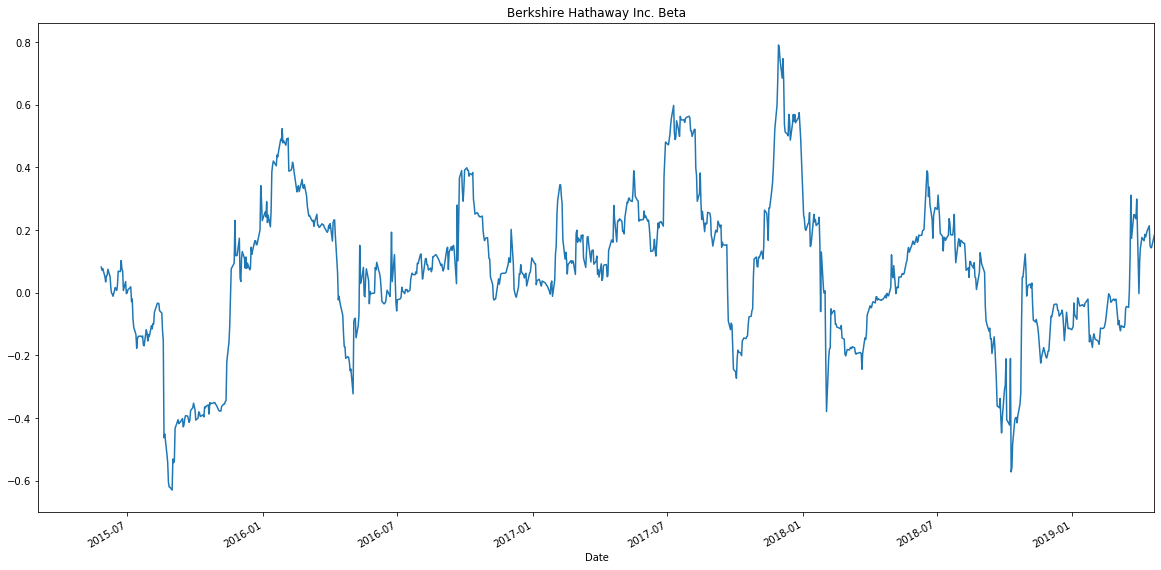

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
variance = combined_portfolio["S&P 500"].rolling(window=60).var()
covariance = combined_portfolio["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_portfolio["S&P 500"])
beta = covariance / variance
beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc. Beta")

Given the high volatility of the beta plot for the Berkshire Hathaway Inc portfolio, it indicates that it has a high sensitivity to the S&P 500. 

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_portfolio.mean() * 252) / (combined_portfolio_std * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

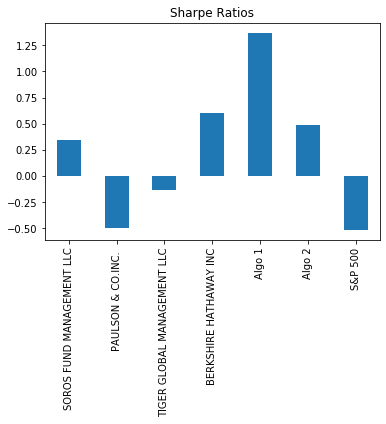

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

The "Algo 1" portfolio outperforms all other portfolios, whereas the "Algo 2" portfolio outperforms all except Berkshire Hathaway INC.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

### Chosen stocks: Adidas, Siemens, Spotify

In [108]:
# Read the first stock (Adidas)
# YOUR CODE HERE
adidas_path = Path("../Resources/adidas_historical.csv")
adidas_hist = pd.read_csv(adidas_path, index_col="Date", parse_dates=True)
adidas_hist["Symbol"] = "ADDDF"
adidas_hist.head()

,Close/Last,Volume,Open,High,Low,Symbol
Date,,,,,,
2020-01-10,$345.18,151,$345.035,$345.54,$343.5,ADDDF
2020-01-09,$342.68,2016,$344.84,$346.6,$342.68,ADDDF
2020-01-08,$336.3,234,$331.49,$340,$331.49,ADDDF
2020-01-07,$327.886,1626,$330.46,$330.46,$327.886,ADDDF
2020-01-06,$323.24,100,$323.24,$323.24,$323.24,ADDDF


In [109]:
# Read the second stock
# YOUR CODE HERE
siemens_path = Path("../Resources/siemens_historical.csv")
siemens_hist = pd.read_csv(siemens_path, index_col="Date", parse_dates=True)
siemens_hist["Symbol"] = "SMMNY"
siemens_hist.head()

,Close/Last,Volume,Open,High,Low,Symbol
Date,,,,,,
2020-01-10,$24.27,130920,$24.14,$24.35,$24.13,SMMNY
2020-01-09,$23.989,30272,$24.03,$24.05,$23.911,SMMNY
2020-01-08,$23.776,22963,$23.74,$23.87,$23.6101,SMMNY
2020-01-07,$23.61,34948,$23.78,$23.9,$23.61,SMMNY
2020-01-06,$23.79,42163,$23.69,$23.87,$23.63,SMMNY


In [133]:
# Read the third stock (Spotify)
# YOUR CODE HERE
spotify_path = Path("../Resources/spotify_historical.csv")
spotify_hist = pd.read_csv(spotify_path, index_col="Date", parse_dates=True)
spotify_hist["Symbol"] = "SPOT"
spotify_hist.head()

,Close/Last,Volume,Open,High,Low,Symbol
Date,,,,,,
2020-01-10,$156.04,1046430,$157.74,$158.66,$154.9,SPOT
2020-01-09,$157.74,1630716,$157.84,$159.98,$157.11,SPOT
2020-01-08,$158.78,974744,$156.33,$159.48,$155.34,SPOT
2020-01-07,$156.02,892885,$156.7,$157.85,$155.01,SPOT
2020-01-06,$156.72,1312307,$151.49,$157,$150.35,SPOT


In [190]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_stocks = pd.concat([adidas_hist, siemens_hist, spotify_hist], axis="rows", join="inner")
custom_stocks = custom_stocks.drop(columns=[" Volume", " Open", " High", " Low"])
custom_stocks = custom_stocks.rename(columns={
    " Close/Last": "NOCP"
})

custom_stocks.head()

,NOCP,Symbol
Date,,
2020-01-10,$345.18,ADDDF
2020-01-09,$342.68,ADDDF
2020-01-08,$336.3,ADDDF
2020-01-07,$327.886,ADDDF
2020-01-06,$323.24,ADDDF


In [191]:
# Drop the "$" sign from the NOCP
custom_stocks["NOCP"] = custom_stocks["NOCP"].str.replace("$", '')
custom_stocks.head()

,NOCP,Symbol
Date,,
2020-01-10,345.18,ADDDF
2020-01-09,342.68,ADDDF
2020-01-08,336.3,ADDDF
2020-01-07,327.886,ADDDF
2020-01-06,323.24,ADDDF


In [192]:
# Change object type to float
custom_stocks["NOCP"] = custom_stocks["NOCP"].astype("float")
custom_stocks.dtypes

NOCP      float64
Symbol     object
dtype: object

In [193]:
# Reset the index
# YOUR CODE HERE
custom_stocks = custom_stocks.reset_index()
custom_stocks.head()

,Date,NOCP,Symbol
0,2020-01-10,345.180,ADDDF
1,2020-01-09,342.680,ADDDF
2,2020-01-08,336.300,ADDDF
3,2020-01-07,327.886,ADDDF
4,2020-01-06,323.240,ADDDF


In [194]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
custom_stocks = custom_stocks.pivot(index="Date", columns="Symbol", values="NOCP")
custom_stocks.head()

Symbol,ADDDF,SMMNY,SPOT
Date,,,
2015-01-13,66.43,NaN,NaN
2015-01-14,66.00,NaN,NaN
2015-01-15,65.18,NaN,NaN
2015-01-16,65.70,NaN,NaN
2015-01-20,67.83,NaN,NaN


In [195]:
# Drop Nulls
# YOUR CODE HERE
stock_returns = custom_stocks.pct_change()
stock_returns.dropna(inplace=True)
stock_returns.head()

Symbol,ADDDF,SMMNY,SPOT
Date,,,
2018-05-14,-0.002193,0.021629,0.020412
2018-05-15,-0.006857,0.000000,-0.007876
2018-05-16,0.022617,-0.012195,0.016886
2018-05-17,-0.003895,-0.013827,-0.016296
2018-05-18,-0.010645,0.000000,-0.050139


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [196]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weighted_returns = stock_returns.dot(weights)
weighted_returns.head()

Date
2018-05-14    0.013283
2018-05-15   -0.004911
2018-05-16    0.009103
2018-05-17   -0.011339
2018-05-18   -0.020261
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [197]:
# YOUR CODE HERE
entire_portfolio = pd.concat([combined_portfolio, weighted_returns], axis="columns", join="inner")
entire_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.013283
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.004911
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009103
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.011339
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.020261


In [198]:
entire_portfolio = entire_portfolio.rename(columns={
    0:"Custom"
})
entire_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.013283
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.004911
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009103
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.011339
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.020261


In [199]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
entire_portfolio.dropna(inplace=True)
entire_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.013283
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.004911
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009103
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.011339
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.020261


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [200]:
# Risk
# YOUR CODE HERE
entire_portfolio_std_annualized = entire_portfolio.std() * np.sqrt(252)
entire_portfolio_std_annualized

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.234818
dtype: float64

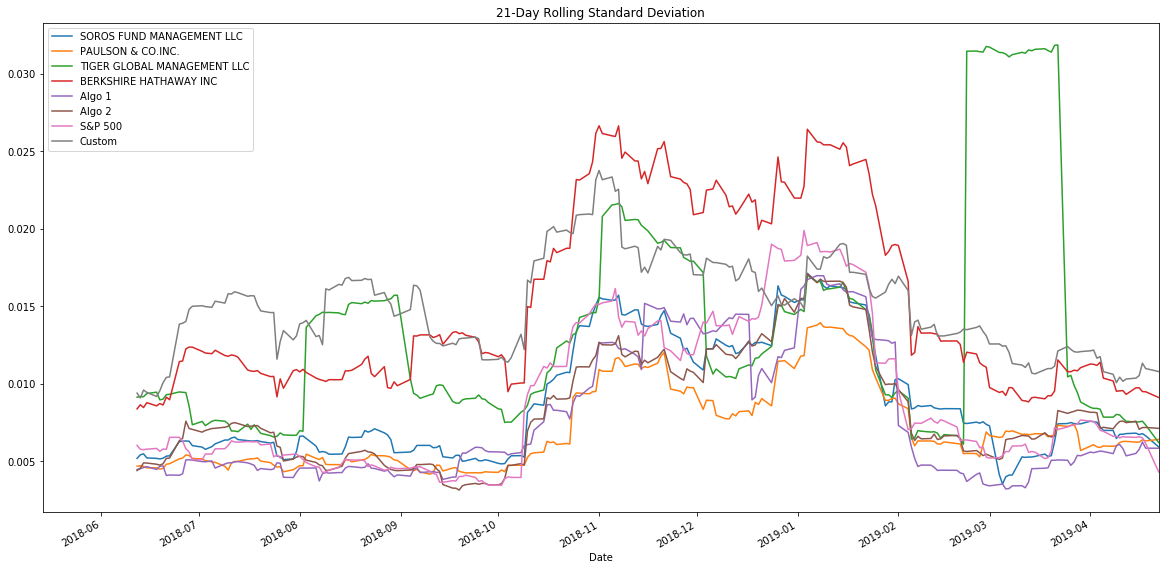

In [201]:
# Rolling
# YOUR CODE HERE
rolling_std = entire_portfolio.rolling(window=21).std()

rolling_std.plot(figsize=(20,10), title="21-Day Rolling Standard Deviation")

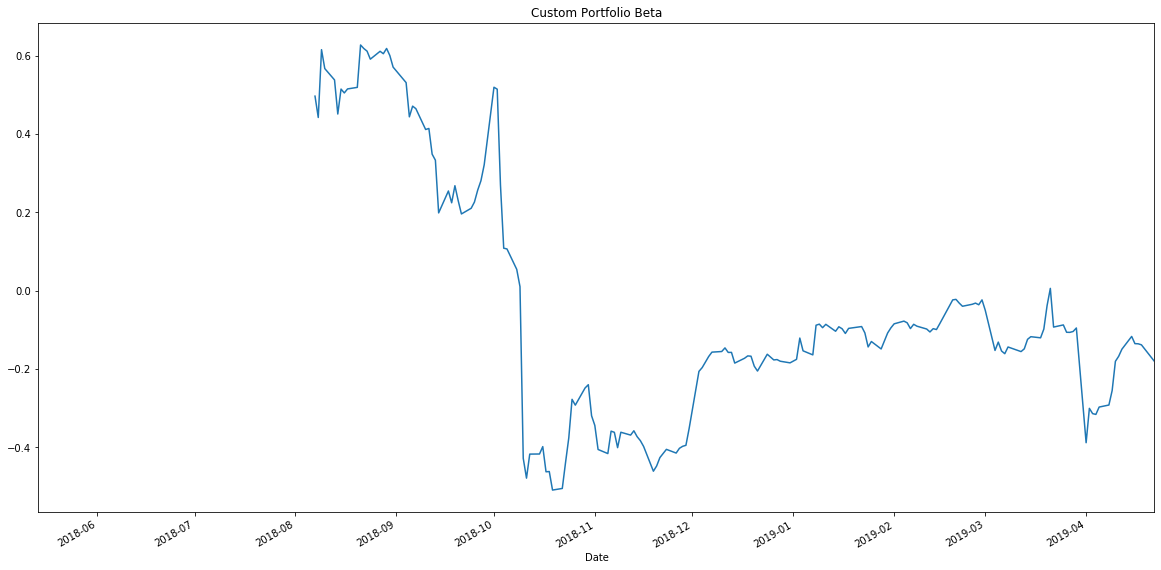

In [202]:
# Beta
# YOUR CODE HERE
variance = entire_portfolio["S&P 500"].rolling(window=60).var()
covariance = entire_portfolio["Custom"].rolling(window=60).cov(entire_portfolio["S&P 500"])
beta = covariance / variance
beta.plot(figsize=(20,10), title="Custom Portfolio Beta")

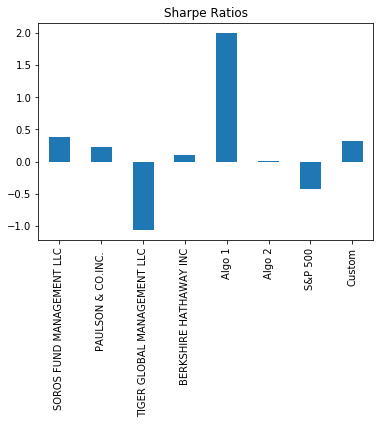

In [203]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
custom_sharpe_ratios = (entire_portfolio.mean() * 252) / (entire_portfolio_std_annualized)
custom_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [182]:
# YOUR CODE HERE
entire_portfolio_correlation = entire_portfolio.corr()
entire_portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.550995
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.378897
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.217925
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.655200
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.210572
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.536327
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,-0.087874
Custom,0.550995,0.378897,0.217925,0.655200,0.210572,0.536327,-0.087874,1.000000


My custom portfolio has one of the highest volatilities, second only to Berkshire Hathaway Inc. Starting around October 2018, the beta has stayed mostly negative, indicating opposite movement compared to the S%P 500. Going by the sharpe ratios, the my custom portfolio outperforms all other portfolios except Soros Fund Management LLC and Berkshire Hathaway Inc.

Analyze the data to see if any of the portfolios outperform the stock market (i.e., the S&P 500).

#### Performance Analysis

1. Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?

* All portfolios seem to outperform the S&P 500, albeit some considerably more than others. Two in particular, Tiger Global Management LLC and Paulson & Co. INC., just norrowly had better returns than the benchmark.

#### Risk Analysis

1. Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?

* The box for Berkshire Hathaway INC has the largest spread and Paulson & CO INC had the lowest.

2. Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

* The porfolios of Tiger Global Management LLC and Berkshire Hathaway are riskier than the S&P 500.

#### Rolling Statistics

1. Plot the rolling standard deviation of the firm's portfolios along with the rolling standard deviation of the S&P 500. Does risk increase for each of the portfolios at the same time risk increases in the S&P?

* There seems to be a trend that indicates that the risk in all portfolios increases at the same time as the risk in S&P 500 increases. 

2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?

* The portfolio of Paulson & CO INC has the most correlation to the S&P 500.

3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

* Given the high volatility of the beta plot for the Berkshire Hathaway Inc portfolio, it indicates that it has a high sensitivity to the S&P 500. 

### Plot Sharpe Ratios

Investment managers and their institutional investors look at the return-to-risk ratio, not just the returns. (After all, if you have two portfolios that each offer a 10% return, yet one is lower risk, you would invest in the lower-risk portfolio, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.

2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

* The "Algo 1" portfolio outperforms all other portfolios, whereas the "Algo 2" portfolio outperforms all except Berkshire Hathaway INC.

### Create Custom Portfolio

Harold is ecstatic that you were able to help him prove that the algorithmic trading portfolios are doing so well compared to the market and whales portfolios. However, now you are wondering whether you can choose your own portfolio that performs just as well as the algorithmic portfolios. Investigate by doing the following:

1. Visit [NASDAQ's Historical Price Data](https://www.nasdaq.com/quotes/historical-quotes.aspx) and choose 3-5 stocks for your own portfolio.

2. Download the data as CSV files and calculate the portfolio returns.

3. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

* My custom portfolio has one of the highest volatilities, second only to Berkshire Hathaway Inc. Starting around October 2018, the beta has stayed mostly negative, indicating opposite movement compared to the S%P 500. Going by the sharpe ratios, the my custom portfolio outperforms all other portfolios except Soros Fund Management LLC and Berkshire Hathaway Inc.